In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 101

In [3]:
featureNames= ['Region-centroid-col', 'Region-centroid-row', 'Region-pixel-count',
       'Short-line-density-5', 'Short-line-density-2', 'Vedge-mean',
       'Vedge-sd', 'Hedge-mean', 'Hedge-sd', 'Intensity-mean',
       'Rawred-mean', 'Rawblue-mean', 'Rawgreen-mean', 'Exred-mean',
       'Exblue-mean', 'Exgreen-mean', 'Value-mean', 'Saturation-mean',
       'Hue-mean', 'class']
df = pd.read_csv(r'dataset/segment.csv', header=None, names=featureNames)

In [4]:
k = df.describe()

In [5]:
df.head()

,Region-centroid-col,Region-centroid-row,Region-pixel-count,Short-line-density-5,Short-line-density-2,Vedge-mean,Vedge-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturation-mean,Hue-mean,class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,negative
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,negative
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918,negative
3,32,173,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858,negative
4,61,197,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274,negative


Text(0.5, 1.0, 'Class Frequency')

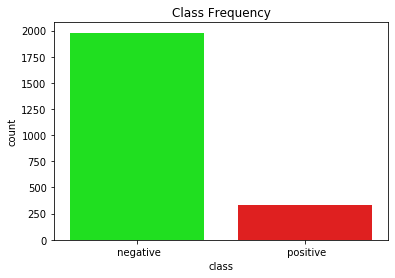

In [6]:
colors = ["#00FF00", "#FF0000"]
sns.countplot('class', data=df, palette=colors)
plt.title('Class Frequency')

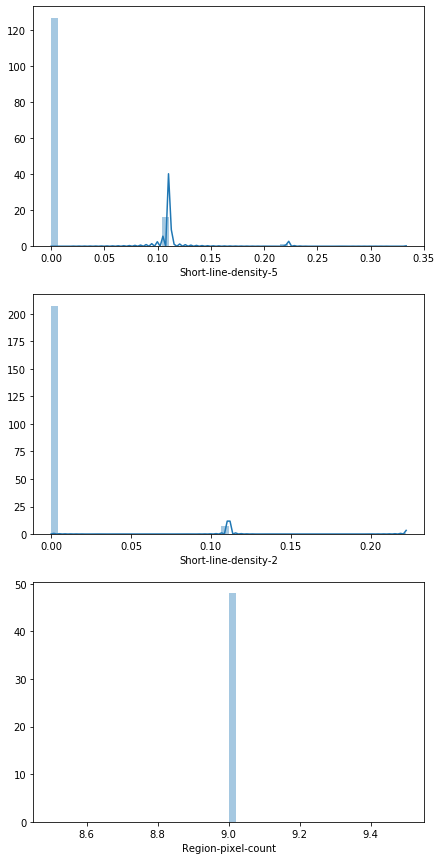

In [7]:
f, axes = plt.subplots(3, 1, figsize=(7,15))
sns.distplot(df["Short-line-density-5"], ax=axes[0])
sns.distplot(df["Short-line-density-2"], ax=axes[1])
sns.distplot(df["Region-pixel-count"], ax=axes[2])
plt.show()

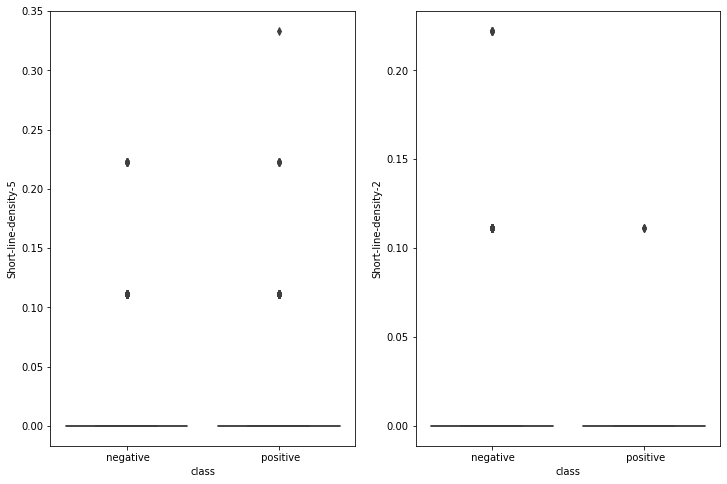

In [8]:
f, axes = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(x='class', y='Short-line-density-5', data=df, ax=axes[0])
sns.boxplot(x='class', y='Short-line-density-2', data=df, ax=axes[1])

In [9]:
df = df.drop(columns=['Short-line-density-5', 'Short-line-density-2', 'Region-pixel-count'])

In [10]:
df.describe()

,Region-centroid-col,Region-centroid-row,Vedge-mean,Vedge-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturation-mean,Hue-mean
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2.308000e+03,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,124.973137,123.353986,1.894473,5.713534,2.425428,8.250467e+00,37.072020,32.839881,44.214761,34.161419,-12.696418,21.428221,-8.731802,45.160601,0.426791,-1.364374
std,72.951969,57.449972,2.699838,44.865657,3.611421,5.883655e+01,38.185654,35.045577,43.536316,36.374221,11.585910,19.567626,11.539732,42.931843,0.228328,1.544263
min,1.000000,11.000000,0.000000,0.000000,0.000000,-1.590000e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,0.722222,0.355555,0.777780,4.216376e-01,7.296296,7.000000,9.555555,6.083333,-18.583333,4.194444,-16.777779,11.555555,0.283992,-2.188539
50%,121.000000,122.000000,1.222224,0.833333,1.444444,9.629633e-01,21.592592,19.611111,27.777779,20.333334,-10.888889,19.666666,-10.888889,28.666666,0.374559,-2.051490
75%,189.000000,172.000000,2.166667,1.806368,2.555556,2.187798e+00,53.277778,47.333332,64.916668,46.555557,-4.222222,35.805557,-3.222222,64.916668,0.540123,-1.565745
max,254.000000,251.000000,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


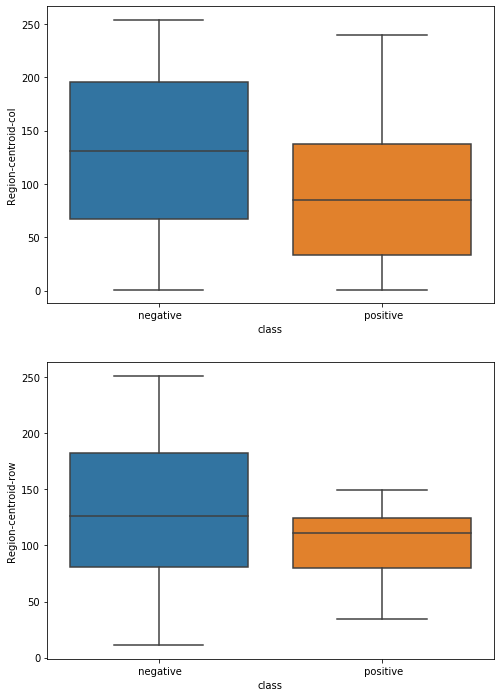

In [11]:
f, ax = plt.subplots(2, 1, figsize=(8,12))
sns.boxplot(x='class', y='Region-centroid-col', data=df, ax=ax[0])
sns.boxplot(x='class', y='Region-centroid-row', data=df, ax=ax[1])

In [12]:
df = df.drop(columns=['Region-centroid-col', 'Region-centroid-row'])

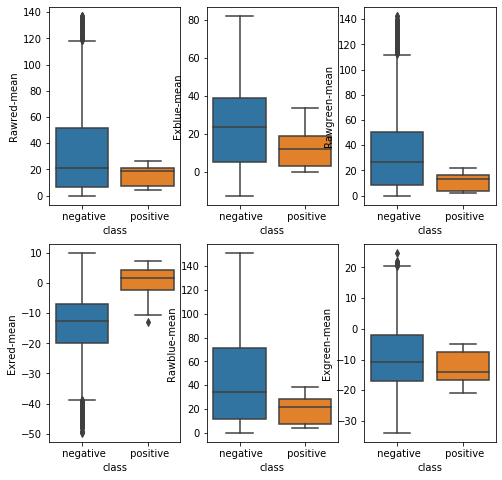

In [13]:
f, ax = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(x='class', y='Rawred-mean', data=df, ax=ax[0][0])
sns.boxplot(x='class', y='Rawblue-mean', data=df, ax=ax[1][1])
sns.boxplot(x='class', y='Rawgreen-mean', data=df, ax=ax[0][2])
sns.boxplot(x='class', y='Exred-mean', data=df, ax=ax[1][0])
sns.boxplot(x='class', y='Exblue-mean', data=df, ax=ax[0][1])
sns.boxplot(x='class', y='Exgreen-mean', data=df, ax=ax[1][2])

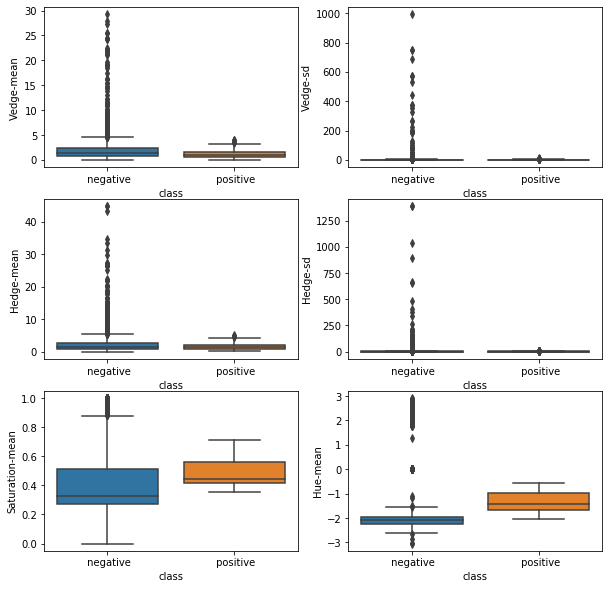

In [14]:
f, ax = plt.subplots(3, 2, figsize=(10,10))
sns.boxplot(x='class', y='Vedge-mean', data=df, ax=ax[0][0])
sns.boxplot(x='class', y='Vedge-sd', data=df, ax=ax[0][1])
sns.boxplot(x='class', y='Hedge-mean', data=df, ax=ax[1][0])
sns.boxplot(x='class', y='Hedge-sd', data=df, ax=ax[1][1])
sns.boxplot(x='class', y='Saturation-mean', data=df, ax=ax[2][0])
sns.boxplot(x='class', y='Hue-mean', data=df, ax=ax[2][1])

## Outlier Removal

In [15]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] > threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df
    
df = removeOutlier(df, 'Hedge-sd', 10)
df = removeOutlier(df, 'Vedge-sd', 8)
df = removeOutlier(df, 'Hedge-mean', 7)
df = removeOutlier(df, 'Vedge-mean', 8)
df = removeOutlier(df, 'Hue-mean', -.25)
df = removeOutlier(df, 'Hue-mean', -2.75, False)

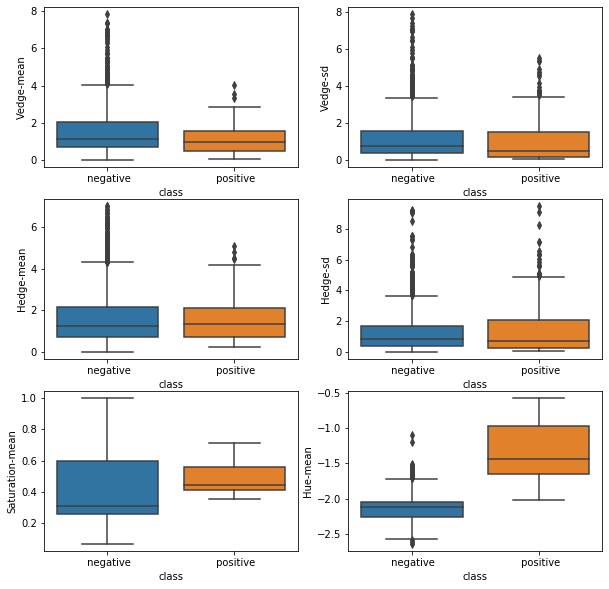

In [16]:
f, ax = plt.subplots(3, 2, figsize=(10,10))
sns.boxplot(x='class', y='Vedge-mean', data=df, ax=ax[0][0])
sns.boxplot(x='class', y='Vedge-sd', data=df, ax=ax[0][1])
sns.boxplot(x='class', y='Hedge-mean', data=df, ax=ax[1][0])
sns.boxplot(x='class', y='Hedge-sd', data=df, ax=ax[1][1])
sns.boxplot(x='class', y='Saturation-mean', data=df, ax=ax[2][0])
sns.boxplot(x='class', y='Hue-mean', data=df, ax=ax[2][1])

In [17]:
df = df.reset_index()
df = df.drop(columns='index')

In [18]:
df.describe()

,Vedge-mean,Vedge-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturation-mean,Hue-mean
count,1714.000000,1714.000000,1714.000000,1.714000e+03,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000
mean,1.452580,1.121168,1.628679,1.284681e+00,42.896841,38.367950,51.786206,38.536367,-13.586672,26.668093,-13.081421,51.845132,0.442534,-1.987310
std,1.179876,1.190808,1.310423,1.395218e+00,41.918272,38.389730,47.000966,40.611070,12.846695,18.117954,7.278122,46.946917,0.242495,0.382887
min,0.000000,0.000000,0.000000,-1.590000e-08,0.037037,0.000000,0.111111,0.000000,-49.666668,0.222222,-33.888890,0.111111,0.068883,-2.639389
25%,0.625001,0.311111,0.722222,3.740741e-01,6.194444,6.777778,8.666667,3.694444,-20.444445,10.888889,-18.444445,8.777778,0.278457,-2.220410
50%,1.111109,0.712326,1.222222,7.851852e-01,26.351852,23.444445,34.722224,20.222221,-12.000000,24.888890,-13.666667,34.722224,0.351729,-2.085416
75%,1.944445,1.529630,2.111112,1.729641e+00,59.740740,53.111110,74.722225,52.194443,-3.222222,41.305554,-7.222222,74.722225,0.564153,-1.962785
max,7.833334,7.840740,7.000000,9.496296e+00,143.444440,137.111110,150.888890,142.555560,7.222222,82.000000,0.333333,150.888890,1.000000,-0.570940


In [19]:

X = df
y = X.pop('class')


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03
mean,-5.628844e-17,-2.331857e-17,-6.218285e-17,4.158478e-17,2.059807e-17,-1.028608e-16,-1.551980e-16,-2.677749e-16,2.590952e-18,-9.884483e-17,1.101155e-17,-1.178883e-16,1.129655e-16,-3.285327e-16
std,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00
min,-1.231489e+00,-9.417932e-01,-1.243228e+00,-9.210432e-01,-1.022760e+00,-9.997244e-01,-1.099768e+00,-9.491898e-01,-2.809324e+00,-1.460076e+00,-2.859741e+00,-1.102290e+00,-1.541310e+00,-1.703558e+00
25%,-7.016164e-01,-6.804564e-01,-6.919304e-01,-6.528534e-01,-8.758259e-01,-8.231210e-01,-9.176859e-01,-8.581919e-01,-5.339719e-01,-8.711695e-01,-7.370843e-01,-9.176305e-01,-6.768158e-01,-6.089739e-01
50%,-2.894968e-01,-3.434315e-01,-3.102629e-01,-3.581103e-01,-3.948115e-01,-3.888504e-01,-3.631619e-01,-4.510960e-01,1.235442e-01,-9.822975e-02,-8.043515e-02,-3.648356e-01,-3.745718e-01,-2.563028e-01
75%,4.169999e-01,3.431127e-01,3.682585e-01,3.190109e-01,4.019444e-01,3.841512e-01,4.881328e-01,3.364122e-01,8.070149e-01,8.081339e-01,8.052776e-01,4.874392e-01,5.016818e-01,6.407083e-02
max,5.409565e+00,5.644514e+00,4.100119e+00,5.887258e+00,2.399358e+00,2.572875e+00,2.109140e+00,2.562098e+00,1.620258e+00,3.054873e+00,1.843699e+00,2.110312e+00,2.299551e+00,3.700265e+00


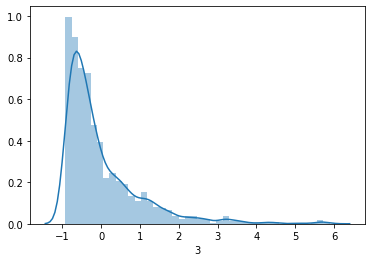

In [22]:
sns.distplot(X[3])

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)


## Model tuning
using `GridSearchCV` to select the best parameter

In [24]:
# Classifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

# Parameter decider
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [25]:
lr_par = {'C': [0.01, 0.1, 0.5, 0.75, 1, 10, 100], 'penalty': ['l1', 'l2']}
svm_par = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
mlp_par = {'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [(32,), (16,), (16,16), (8,8)]}
dt_par = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': list(range(2,5,1)), 'min_samples_leaf': list(range(5,8,1))}
#nb_par = {'alpha': [0, 0.25, 0.5, 0.75, 1], 'fit_prior': [True, False]}
knn_par = {'n_neighbors': list(range(3,7,2)), 'weights':['uniform','distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [26]:
clf = []
clf_name = ['lr', 'svm', 'mlp', 'dt', 'knn']
clf.append(GridSearchCV(LogisticRegression(random_state=seed), lr_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(SVC(random_state=seed), svm_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(MLPClassifier(random_state=seed), mlp_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(DecisionTreeClassifier(random_state=seed), dt_par).fit(X, y).best_estimator_)
#clf.append(GridSearchCV(ComplementNB(), nb_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(KNeighborsClassifier(), knn_par).fit(X, y).best_estimator_)


In [27]:
res = []
res_name = ['smote', 'bsmote', 'adasyn', 'ros', 'rus', 'tl', 'noRes']
res.append(SMOTE(random_state=seed))
res.append(BorderlineSMOTE(random_state=seed))
res.append(ADASYN(random_state=seed))
res.append(RandomOverSampler(random_state=seed))
res.append(RandomUnderSampler(random_state=seed))
res.append(TomekLinks(sampling_strategy='majority', random_state=seed))
res.append(None)

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

In [29]:
# 5 cv, 6+1 resampling, 5 classifier
scores = [None] * 5
for i in range(len(scores)):
    scores[i] = [None] * len(res)
    for j in range(len(scores[i])):
        scores[i][j] = [None] * len(clf)
        
cross = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for i in range(len(res)):
        if i == len(res) - 1:
            X_res, y_res = X_train, y_train
        else:
            X_res, y_res = res[i].fit_resample(X_train, y_train)
        for j in range(len(clf)):
            classifier = clf[j].fit(X_res, y_res)
            scores[cross][i][j] = GetMetrics(classifier, X_test, y_test)
    cross = cross + 1


In [30]:
def autolabel(rects, axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 3)
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [31]:
clf_accs = []
clf_recs = []
clf_recs_major = []
for index in range(len(clf)):
    acc = []
    rec = []
    rec_major = []
    for cross in range(5):
        for i in range(len(res)):
            acc.append(scores[cross][i][index][0])
            rec.append(scores[cross][i][index][2][1])
            rec_major.append(scores[cross][i][index][2][0])
    clf_accs.append(np.mean(acc))
    clf_recs.append(np.mean(rec))
    clf_recs_major.append(np.mean(rec_major))


In [32]:
res_accs = []
res_recs = []
res_recs_major = []
for index in range(len(res)):
    acc = []
    rec = []
    rec_major = []
    for cross in range(5):
        for i in range(len(clf)):
            acc.append(scores[cross][index][i][0])
            rec.append(scores[cross][index][i][2][1])
            rec_major.append(scores[cross][index][i][2][0])
    res_accs.append(np.mean(acc))
    res_recs.append(np.mean(rec))
    res_recs_major.append(np.mean(rec_major))


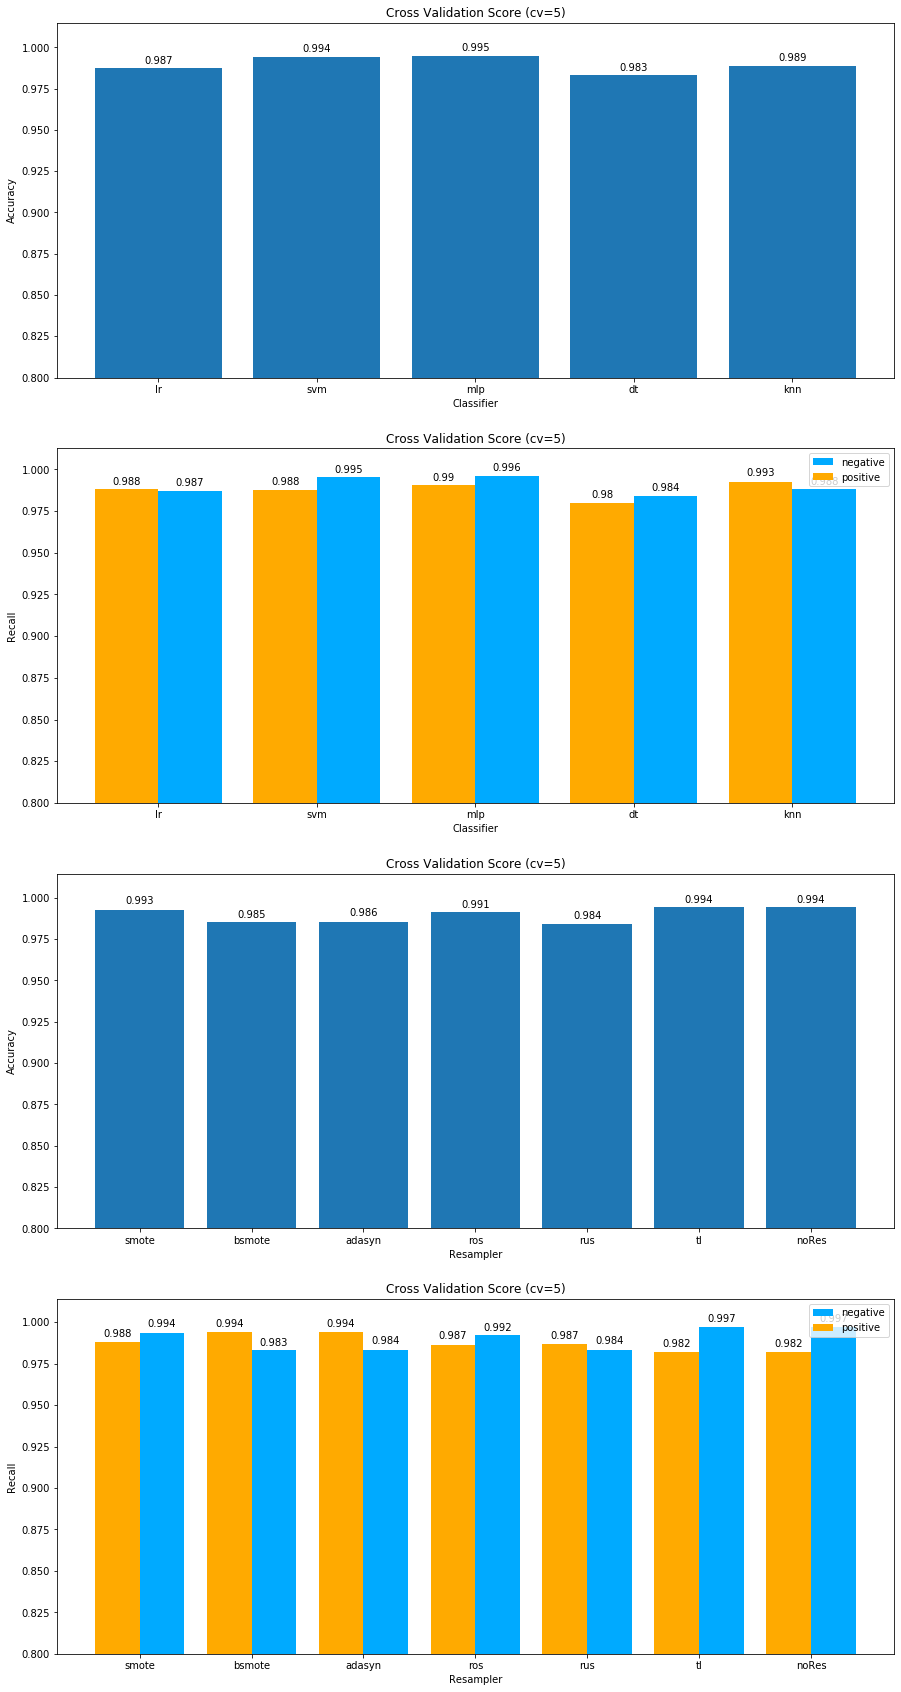

In [33]:
width = 0.40 

x = np.arange(len(clf_name))

fig, ax = plt.subplots(4,1, figsize=(15,30))

# first plot
rect = ax[0].bar(clf_name, clf_accs)
ax[0].axes.set_ylim(0.8, np.min(np.max(clf_accs)+0.02), 1.0)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Classifier')
ax[0].set_title('Cross Validation Score (cv=5)')
autolabel(rect, ax[0])

# second plot
rect2 = ax[1].bar(x+width/2, clf_recs_major, width=width, label='negative', color='#00aaff')
rect = ax[1].bar(x-width/2, clf_recs, width=width, label='positive', color='#ffaa00')
ax[1].axes.set_ylim(0.8, np.min(np.max(clf_recs)+0.02), 1.0)
ax[1].set_title('Cross Validation Score (cv=5)')
ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Classifier')
ax[1].set_xticks(x)
ax[1].set_xticklabels(clf_name)
ax[1].legend()
autolabel(rect, ax[1])
autolabel(rect2, ax[1])

x = np.arange(len(res_name))

# third plot
rect = ax[2].bar(res_name, res_accs)
ax[2].axes.set_ylim(0.8, np.min(np.max(res_accs)+0.02), 1.0)
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Resampler')
ax[2].set_title('Cross Validation Score (cv=5)')
autolabel(rect, ax[2])

# fourth plot
rect2 = ax[3].bar(x+width/2, res_recs_major, width=width, label='negative', color='#00aaff')
rect = ax[3].bar(x-width/2, res_recs, width=width, label='positive', color='#ffaa00')

ax[3].axes.set_ylim(0.8, np.min(np.max(res_recs)+0.02), 1.0)
ax[3].set_title('Cross Validation Score (cv=5)')
ax[3].set_ylabel('Recall')
ax[3].set_xlabel('Resampler')
ax[3].set_xticks(x)
ax[3].set_xticklabels(res_name)
ax[3].legend()
autolabel(rect, ax[3])
autolabel(rect2, ax[3])

In [34]:
index = tuple()
best_score = 0
metric_index = 2 # 0 for accuracy, 1 for precision, 2 for recall, 3 for f1-score
for i in range(len(res)):
    for j in range(len(clf)):
        score = []
        for cross in range(5):
            if metric_index == 0:
                score.append(scores[cross][i][j][0])
            else:
                score.append(scores[cross][i][j][metric_index][1])
        if np.mean(score) > best_score:
            index = (i, j)
            res_index = i
            clf_index = j
            best_score = np.mean(score)

In [35]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
majority_scores = []
minority_scores = []

for i in range(len(metrics)):
    majority_cv_score = []
    minority_cv_score = []
    for j in range(5):
        if i == 0:
            majority_cv_score.append(scores[j][res_index][clf_index][0])
            minority_cv_score.append(scores[j][res_index][clf_index][0])
        else:
            majority_cv_score.append(scores[j][res_index][clf_index][i][0])
            minority_cv_score.append(scores[j][res_index][clf_index][i][1])
    majority_scores.append(np.mean(majority_cv_score))
    minority_scores.append(np.mean(minority_cv_score))
    
    

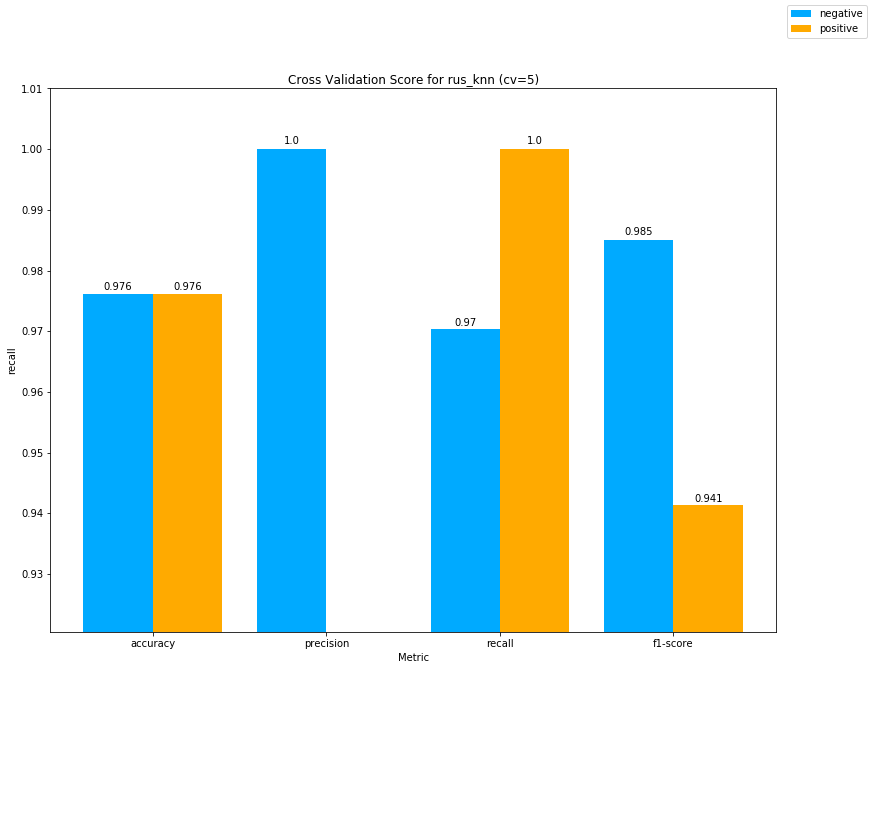

In [36]:
width = 0.40 

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(13,10))


rect = ax.bar(x - width/2, majority_scores, width=width, label='negative', color='#00aaff')
rect2 = ax.bar(x + width/2, minority_scores, width=width, label='positive', color='#ffaa00')
ax.axes.set_ylim(np.min(majority_scores)-0.05, 1.01 )
ax.set_ylabel(metrics[metric_index])
ax.set_xlabel('Metric')
ax.set_title('Cross Validation Score for {}_{} (cv=5)'.format(res_name[res_index], clf_name[clf_index]))
ax.set_xticks(x)
ax.set_xticklabels(metrics)
autolabel(rect, ax)
autolabel(rect2, ax)
fig.legend()

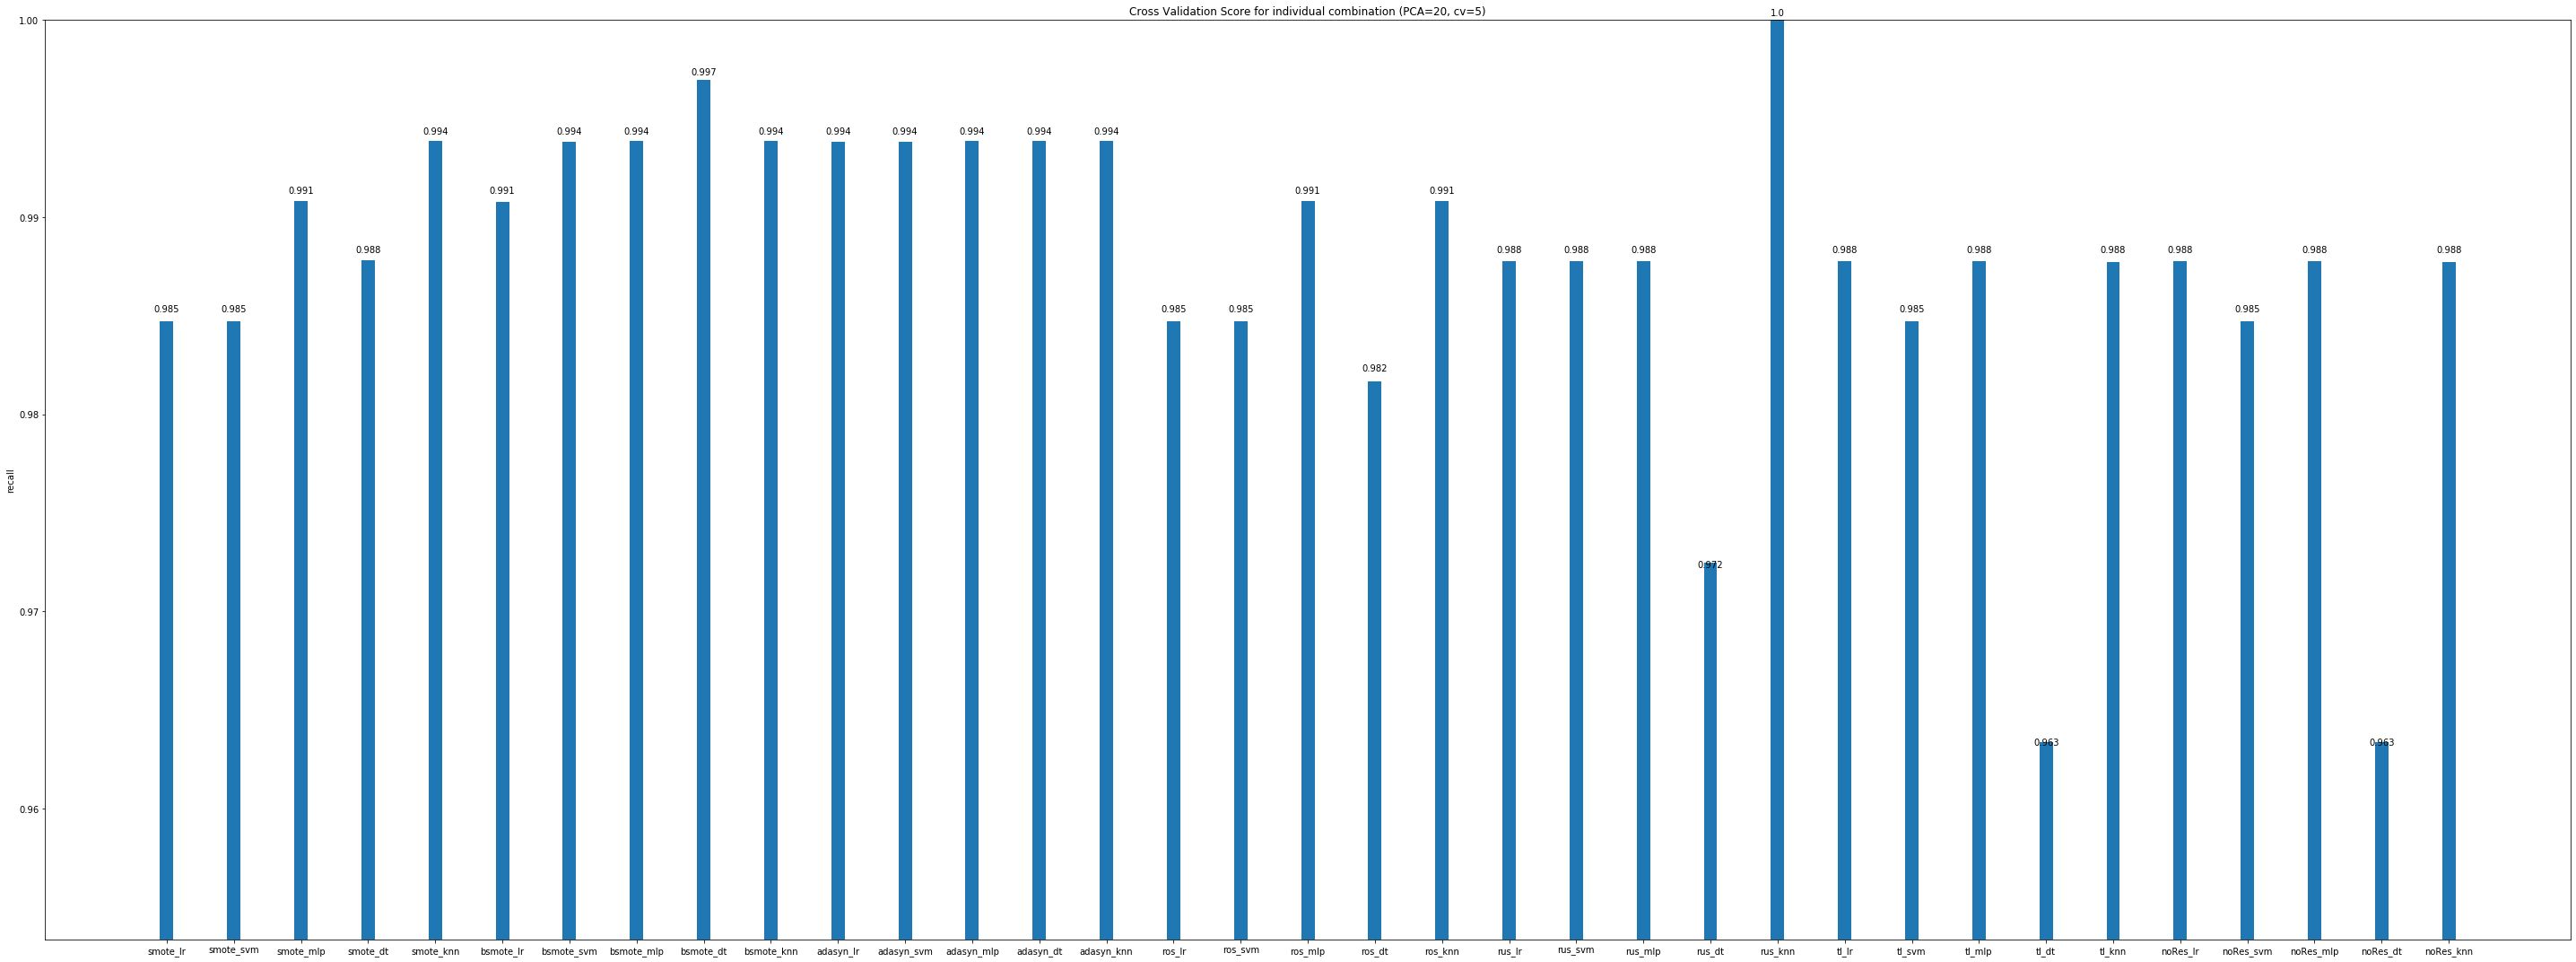

In [37]:
names = []
combinations = []
for i in range(len(res)):
    for j in range(len(clf)):
        names.append(res_name[i]+"_"+clf_name[j])
        score = []
        for cross in range(5):
            if metric_index == 0:
                score.append(scores[cross][i][j][metric_index])
            else:
                score.append(scores[cross][i][j][metric_index][1])
        combinations.append(np.mean(score))
fig, ax = plt.subplots(figsize=(40,15))
x = np.arange(len(names))
width = 0.2 

labels = names
rect = ax.bar(x, combinations, width)
ax.set_ylabel(metrics[metric_index])
ax.set_title('Cross Validation Score for individual combination (PCA=20, cv=5)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axes.set_ylim(np.min(combinations)-0.01, np.min( [ (np.max(combinations)+0.02), 1.0] ))
fig.tight_layout()
autolabel(rect, ax)


NameError: name 'new_score' is not defined

In [40]:
new_score = [None] * len(res)
for i in range(len(new_score)):
    new_score[i] = [None] * len(clf)
    for j in range(len(new_score[i])):
        new_score[i][j] = [None] * 7
        for k in range(len(new_score[i][j])):
            new_score[i][j][k] = 0
# acc, pre major, pre minor, rec major, rec minor, f1 major, f1 minor

for i in range(len(res)):
    for j in range(len(clf)):
        for cross in range(5):
            new_score[i][j][0] += scores[cross][i][j][0]
            new_score[i][j][1] += scores[cross][i][j][1][0]
            new_score[i][j][2] += scores[cross][i][j][1][1]
            new_score[i][j][3] += scores[cross][i][j][2][0]
            new_score[i][j][4] += scores[cross][i][j][2][1]
            new_score[i][j][5] += scores[cross][i][j][3][0]
            new_score[i][j][6] += scores[cross][i][j][3][1]
        for k in range(7):
            new_score[i][j][k] /= 5


In [41]:
dataset_name = 'segmentation'

dataset = [dataset_name] * 35
res_label = []
clf_label = []
m1 = []
m2 = []
m3 = []
m4 = []
m5 = []
m6 = []
m7 = []
for i in range(len(res)):
    for j in range(len(clf)):
        m1.append(new_score[i][j][0])
        m2.append(new_score[i][j][1])
        m3.append(new_score[i][j][2])
        m4.append(new_score[i][j][3])
        m5.append(new_score[i][j][4])
        m6.append(new_score[i][j][5])
        m7.append(new_score[i][j][6])
for i in range(35):
    res_label.append(labels[i].split('_')[0])
    clf_label.append(labels[i].split('_')[1])

d = {'dataset' : dataset, 'res': res_label, 'clf': clf_label, 'accuracy' : m1, 'precision-0': m2, 'precision-1': m3, 'recall-0': m4, 'recall-1': m5, 'f1-0': m6, 'f1-1': m7}
k = pd.DataFrame(d)
k.to_csv('{}_result.csv'.format(dataset_name), index=False)